# Dataset

https://www.kaggle.com/competitions/spaceship-titanic/overview

https://www.kaggle.com/code/odins0n/spaceship-titanic-eda-27-different-models#Modeling-

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn_pandas import CategoricalImputer

# delete outlier
from sklearn.neighbors import LocalOutlierFactor

# tuning parameter
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score


from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

# skip warning
import warnings
warnings.filterwarnings( action= 'ignore')

# tuning parameter
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV

# train machine learning classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection


# metrics
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,explained_variance_score,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline

# train model Convulutional Neural Network
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/gdrive/MyDrive/kaggle/spaceship_titanic/dataset/train.csv")
# df_train = df_train[:2000]
df_train.info()
df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
df_test = pd.read_csv("/content/gdrive/MyDrive/kaggle/spaceship_titanic/dataset/test.csv")
df_test.info()
df_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


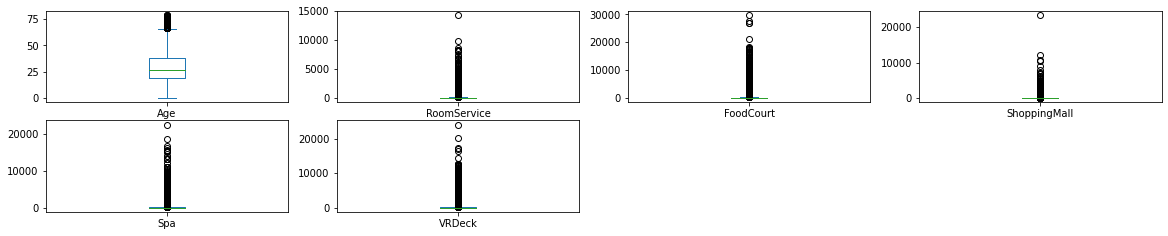

In [ ]:
df_train.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

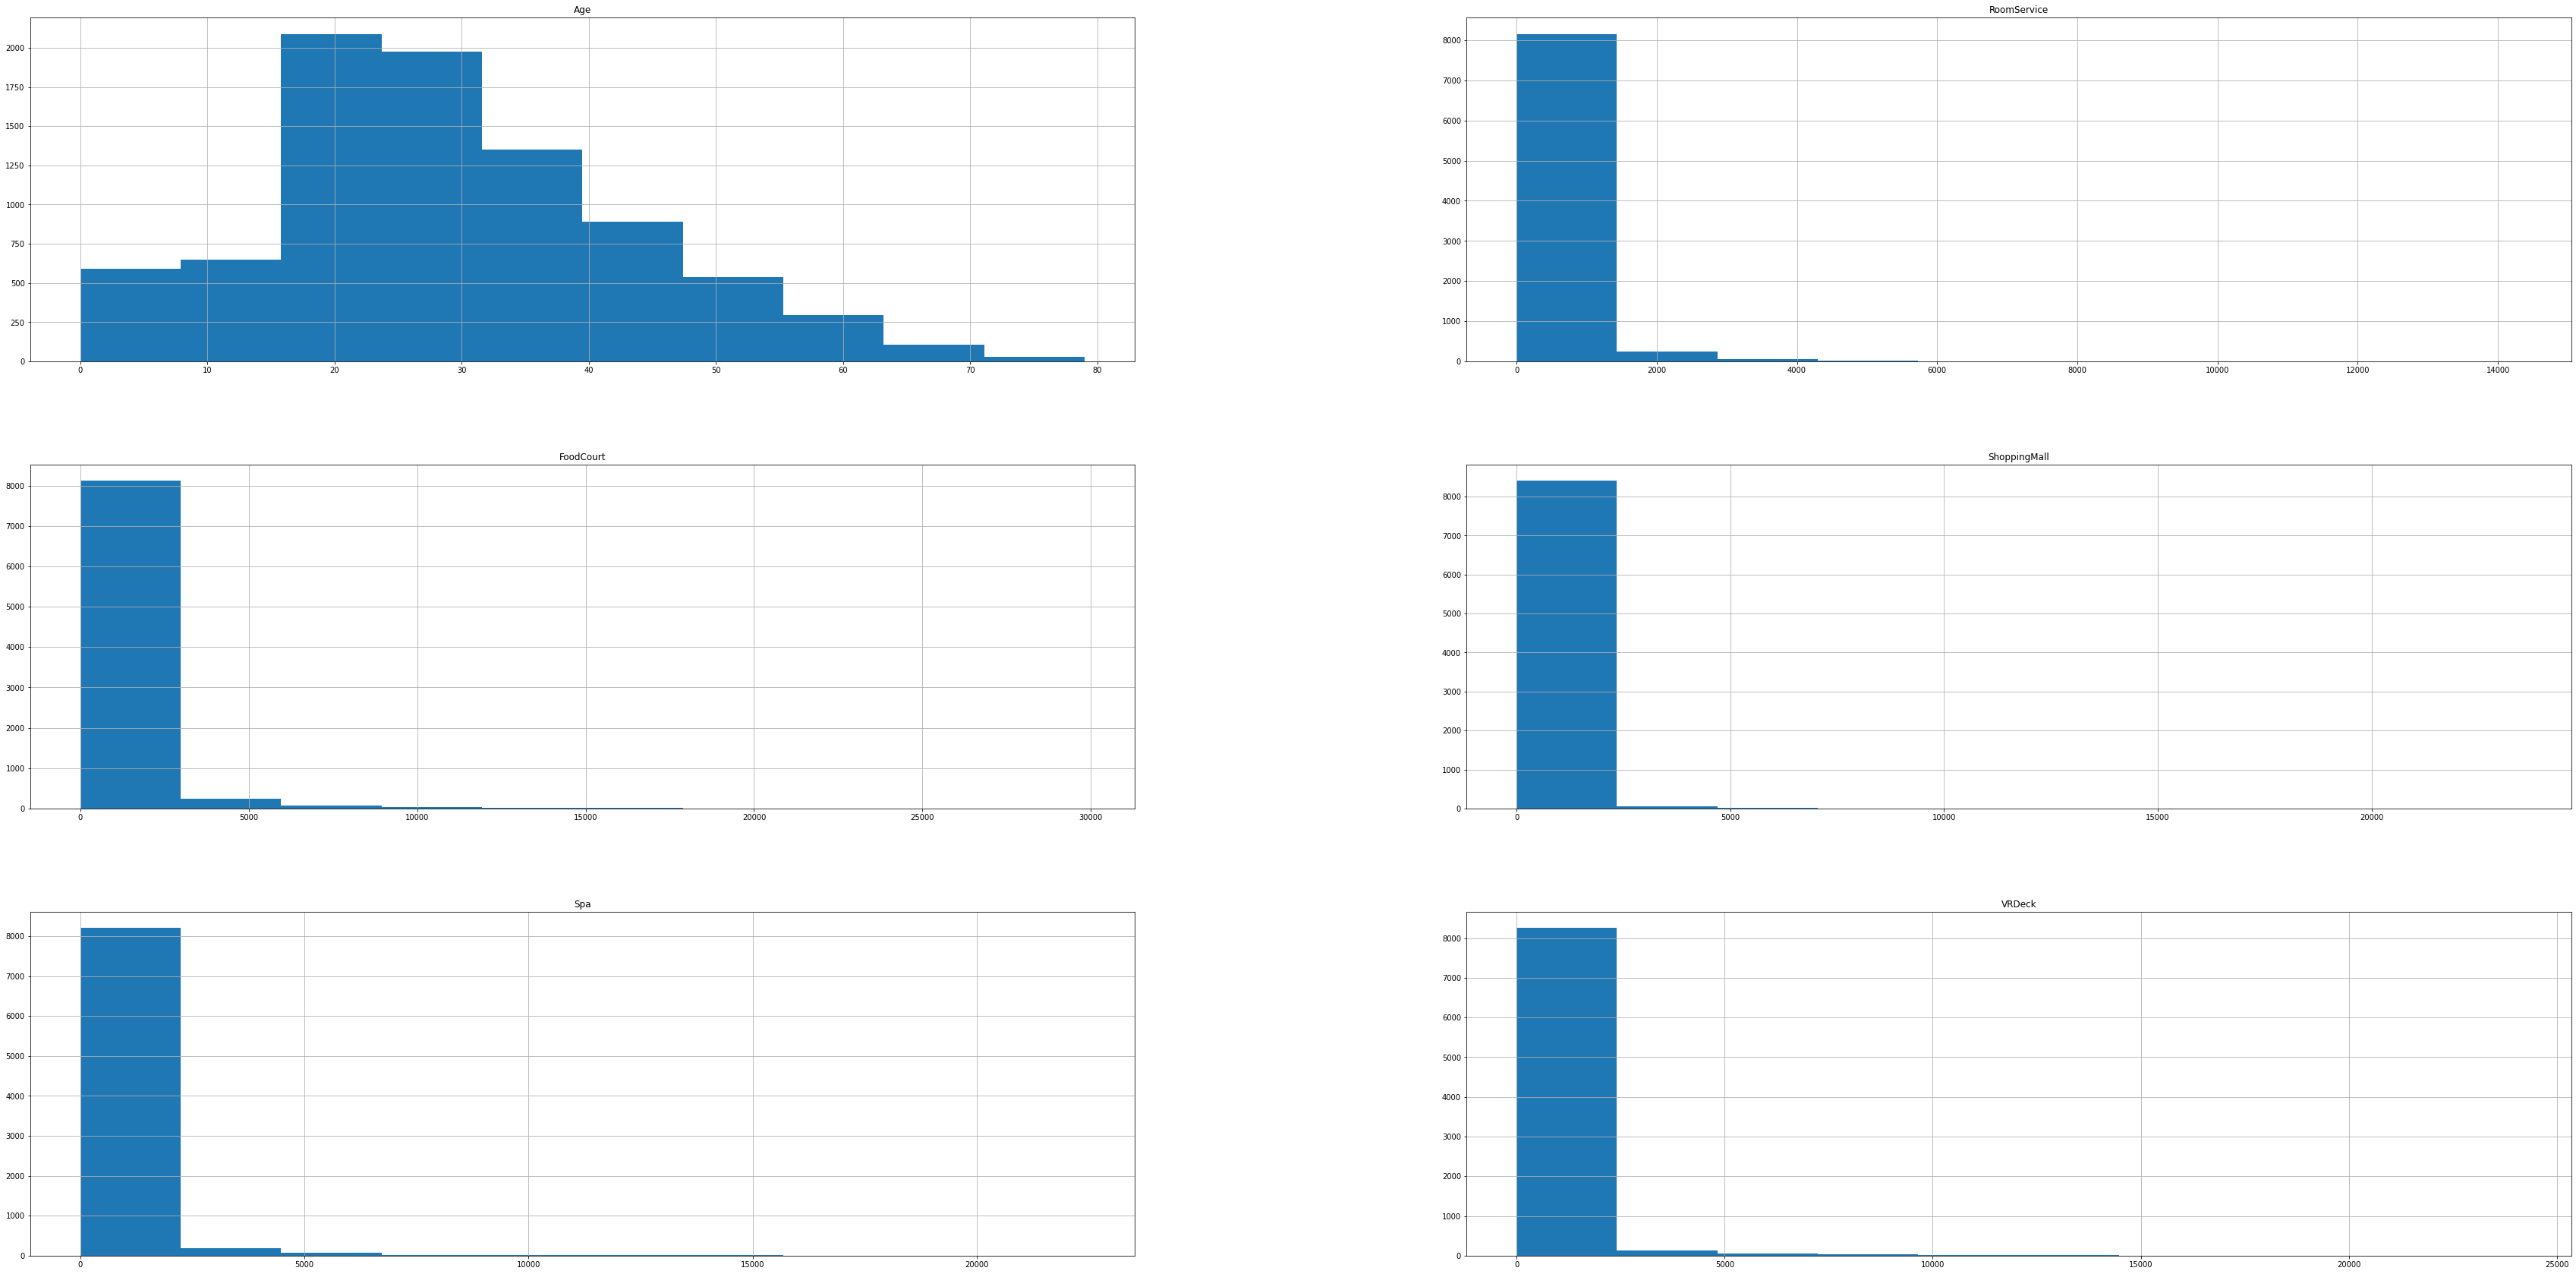

In [ ]:
df_train.hist(figsize = (60,30))
plt.show()

In [ ]:
# only age use mean. Another that use median

# Data Preprocessing

In [ ]:
def check_percent_loss(df):
  list_column = df.columns.tolist()
  for i in range(len(list_column)):
    loss_percent = 100 - (len(df[df[list_column[i]].notna()])/len(df) * 100)
    print(list_column[i],'have percent loss =',loss_percent, 'percent')
percent_loss_train = check_percent_loss(df_train)

PassengerId have percent loss = 0.0 percent
HomePlanet have percent loss = 2.312205222592894 percent
CryoSleep have percent loss = 2.4962613597147083 percent
Cabin have percent loss = 2.2891982054526636 percent
Destination have percent loss = 2.09363855976072 percent
Age have percent loss = 2.0591280340503886 percent
VIP have percent loss = 2.3352122397331243 percent
RoomService have percent loss = 2.082135051190619 percent
FoodCourt have percent loss = 2.1051420683308493 percent
ShoppingMall have percent loss = 2.392729782583686 percent
Spa have percent loss = 2.1051420683308493 percent
VRDeck have percent loss = 2.162659611181411 percent
Name have percent loss = 2.300701714022779 percent
Transported have percent loss = 0.0 percent


In [ ]:
def check_unique(df):
  list_column = df.columns.tolist()
  for i in range(len(list_column)):
    print("=========================")
    print(list_column[i],'=',df[f'{list_column[i]}'].unique())
    print("=========================")
check_unique_train = check_unique(df_train)
# check_unique_test = check_unique(df_test)

PassengerId = ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet = ['Europa' 'Earth' 'Mars' nan]
CryoSleep = [False True nan]
Cabin = ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination = ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age = [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP = [False True nan]
RoomService = [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt = [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall = [   0.   25.  371. ... 1085.  510. 1872.]
Spa = [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck = [   0.   44.   49. ... 1164.  971. 3235.]
Name = ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hont

In [ ]:
# clean Cabin column
df_train[['deck','num', 'side']] = df_train['Cabin'].str.split('/', expand=True)
df_test[['deck','num', 'side']] = df_test['Cabin'].str.split('/', expand=True)

# clean PassengerId
df_train[['group_traveling','number_group']] = df_train['PassengerId'].str.split('_', expand=True)
df_test[['group_traveling','number_group']] = df_test['PassengerId'].str.split('_', expand=True)

# Name
# df_train[['first_name','last_name']] = df_train['Name'].str.split(' ', expand=True)
# df_test[['first_name','last_name']] = df_test['Name'].str.split(' ', expand=True)


# delete useless column
df_train.drop('Cabin', axis=1, inplace=True)
df_train.drop('num', axis=1, inplace=True)
df_train.drop('PassengerId', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
# df_train.drop('first_name', axis=1, inplace=True)



df_test.drop('Cabin', axis=1, inplace=True)
df_test.drop('num', axis=1, inplace=True)
df_test.drop('PassengerId', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
# df_test.drop('first_name', axis=1, inplace=True)




In [ ]:
df_train['group_traveling'] = df_train['group_traveling'].map(lambda x : int(x))
df_train['number_group'] = df_train['number_group'].map(lambda x : int(x))

df_test['group_traveling'] = df_test['group_traveling'].map(lambda x : int(x))
df_test['number_group'] = df_test['number_group'].map(lambda x : int(x))



In [ ]:
# # object type
# # HomePlanet,CryoSleep,Destination,VIP,deck,side
# # non object type
# # Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck

# # convert object
# # # 1) Quantitative variable which can be measured ==> have to inplace value(level such as high low)
# deck,side
# # # 2) Qualitative variable which can not be measured ==> use get dummy(don't have level such as gender)
# HomePlanet,CryoSleep,Destination,VIP


# clean non object type

non object type have Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck columns

In [ ]:
ct = ColumnTransformer(
    [("median_imp", SimpleImputer(strategy = 'median'), ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']),
     ("mean_imp", SimpleImputer(strategy = 'mean'), ['Age'])])
# ct = ColumnTransformer([("mean_imp", SimpleImputer(strategy = 'mean'), ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])])
df_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = ct.fit_transform(df_train)
df_test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = ct.fit_transform(df_test)



In [ ]:
df_train['sum_service'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']
df_train['RoomService_condition'] = df_train['RoomService'].map(lambda x : True if (x==0.0) else False)
df_train['FoodCourt_condition'] = df_train['FoodCourt'].map(lambda x : True if (x==0.0) else False)
df_train['ShoppingMall_condition'] = df_train['ShoppingMall'].map(lambda x : True if (x==0.0) else False)
df_train['Spa_condition'] = df_train['Spa'].map(lambda x : True if (x==0.0) else False)
df_train['VRDeck_condition'] = df_train['VRDeck'].map(lambda x : True if (x==0.0) else False)


df_test['sum_service'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']
df_test['RoomService_condition'] = df_test['RoomService'].map(lambda x : True if (x==0.0) else False)
df_test['FoodCourt_condition'] = df_test['FoodCourt'].map(lambda x : True if (x==0.0) else False)
df_test['ShoppingMall_condition'] = df_test['ShoppingMall'].map(lambda x : True if (x==0.0) else False)
df_test['Spa_condition'] = df_test['Spa'].map(lambda x : True if (x==0.0) else False)
df_test['VRDeck_condition'] = df_test['VRDeck'].map(lambda x : True if (x==0.0) else False)

# df_train.drop('RoomService', axis=1, inplace=True)
# df_train.drop('FoodCourt', axis=1, inplace=True)
# df_train.drop('ShoppingMall', axis=1, inplace=True)
# df_train.drop('Spa', axis=1, inplace=True)
# df_train.drop('VRDeck', axis=1, inplace=True)




# clean object type

deck,side,HomePlanet,CryoSleep,Destination,VIP

In [ ]:
imputer = CategoricalImputer()
list_feature_dummy = ['deck','side','HomePlanet','CryoSleep','Destination','VIP']

for i in range(len(list_feature_dummy)):
  data_numpy = np.array(df_train[[f'{list_feature_dummy[i]}']], dtype=object)
  predict_categorical = imputer.fit_transform(data_numpy)
  list_answer_predict = [x for sublist in predict_categorical for x in sublist]
  df_train[f'{list_feature_dummy[i]}'] = list_answer_predict

for i in range(len(list_feature_dummy)):
  data_numpy = np.array(df_test[[f'{list_feature_dummy[i]}']], dtype=object)
  predict_categorical = imputer.fit_transform(data_numpy)
  list_answer_predict = [x for sublist in predict_categorical for x in sublist]
  df_test[f'{list_feature_dummy[i]}'] = list_answer_predict


clean object type for Quantitative variable column ==> deck,side

In [ ]:
df_train = df_train.replace(
    {'deck': {'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7},
    'side':{'P': 0, 'S': 1}
})

df_test = df_test.replace(
    {'deck': {'A': 0, 'B': 1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7},
    'side':{'P': 0, 'S': 1}
})

clean object type for Qualitative variable column ==> HomePlanet,CryoSleep,Destination,VIP

In [ ]:
df_train = pd.get_dummies(df_train, columns=['HomePlanet','CryoSleep','Destination','VIP','RoomService_condition','FoodCourt_condition','ShoppingMall_condition','Spa_condition','VRDeck_condition'])
df_test = pd.get_dummies(df_test, columns=['HomePlanet','CryoSleep','Destination','VIP','RoomService_condition','FoodCourt_condition','ShoppingMall_condition','Spa_condition','VRDeck_condition'])




In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           8693 non-null   float64
 1   RoomService                   8693 non-null   float64
 2   FoodCourt                     8693 non-null   float64
 3   ShoppingMall                  8693 non-null   float64
 4   Spa                           8693 non-null   float64
 5   VRDeck                        8693 non-null   float64
 6   Transported                   8693 non-null   bool   
 7   deck                          8693 non-null   int64  
 8   side                          8693 non-null   int64  
 9   group_traveling               8693 non-null   int64  
 10  number_group                  8693 non-null   int64  
 11  sum_service                   8693 non-null   float64
 12  HomePlanet_Earth              8693 non-null   uint8  
 13  Hom

# Exploratory Data Analysis

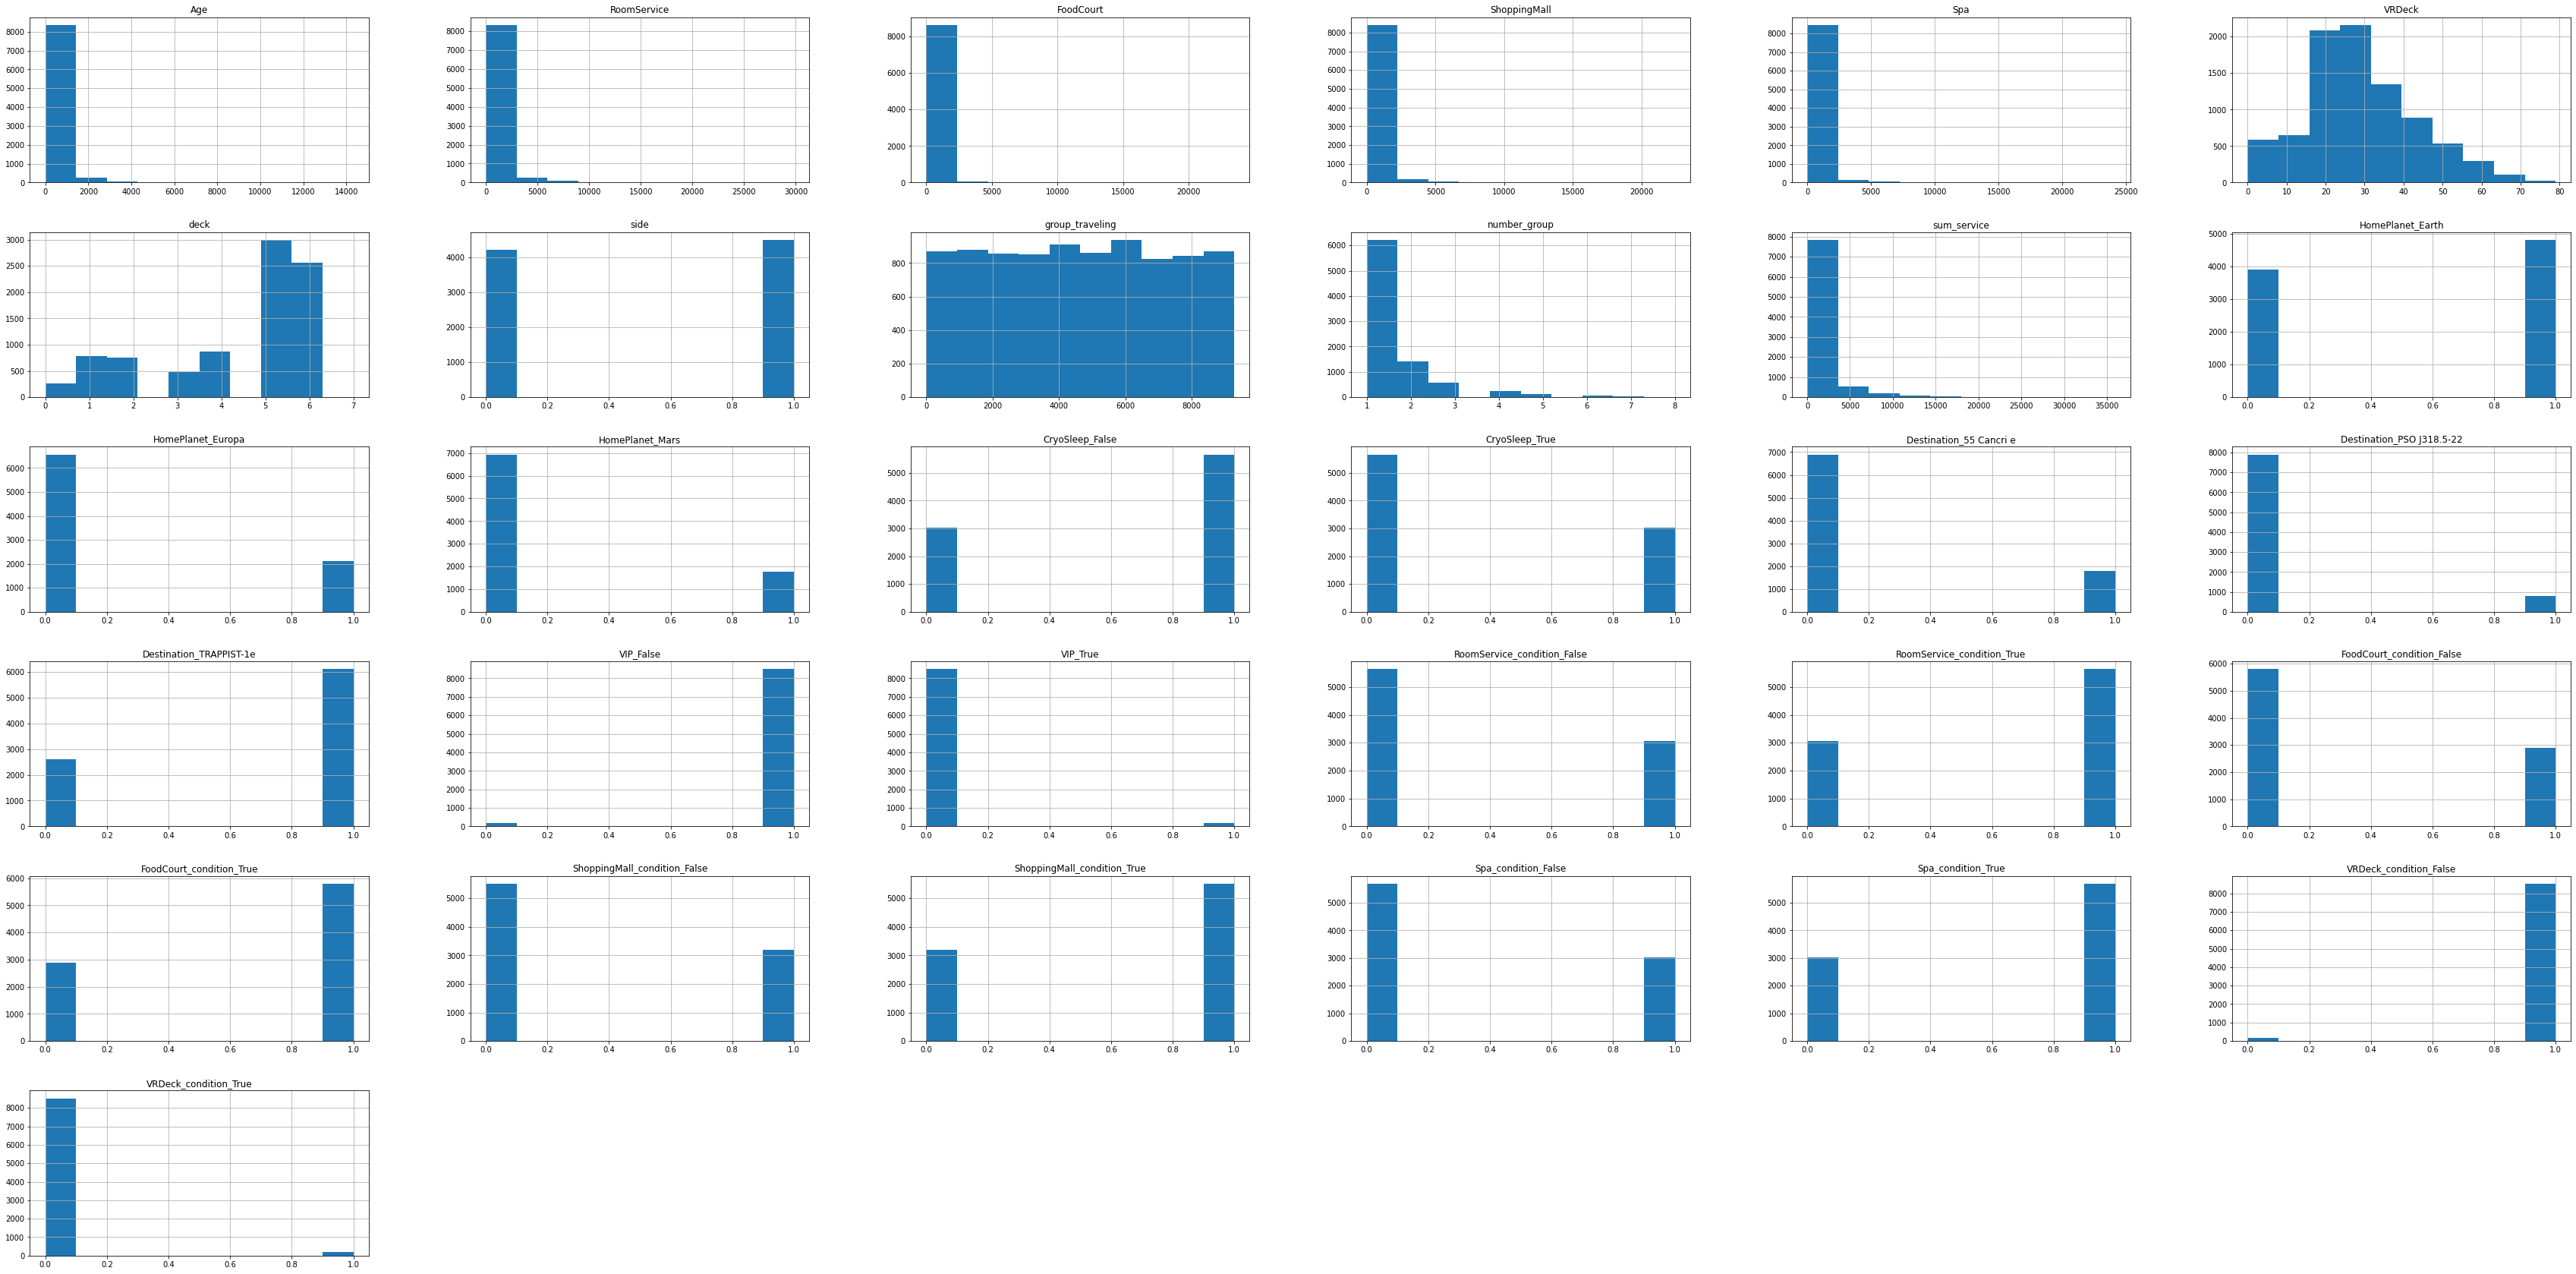

In [ ]:
df_train.hist(figsize = (60,30))
plt.show()

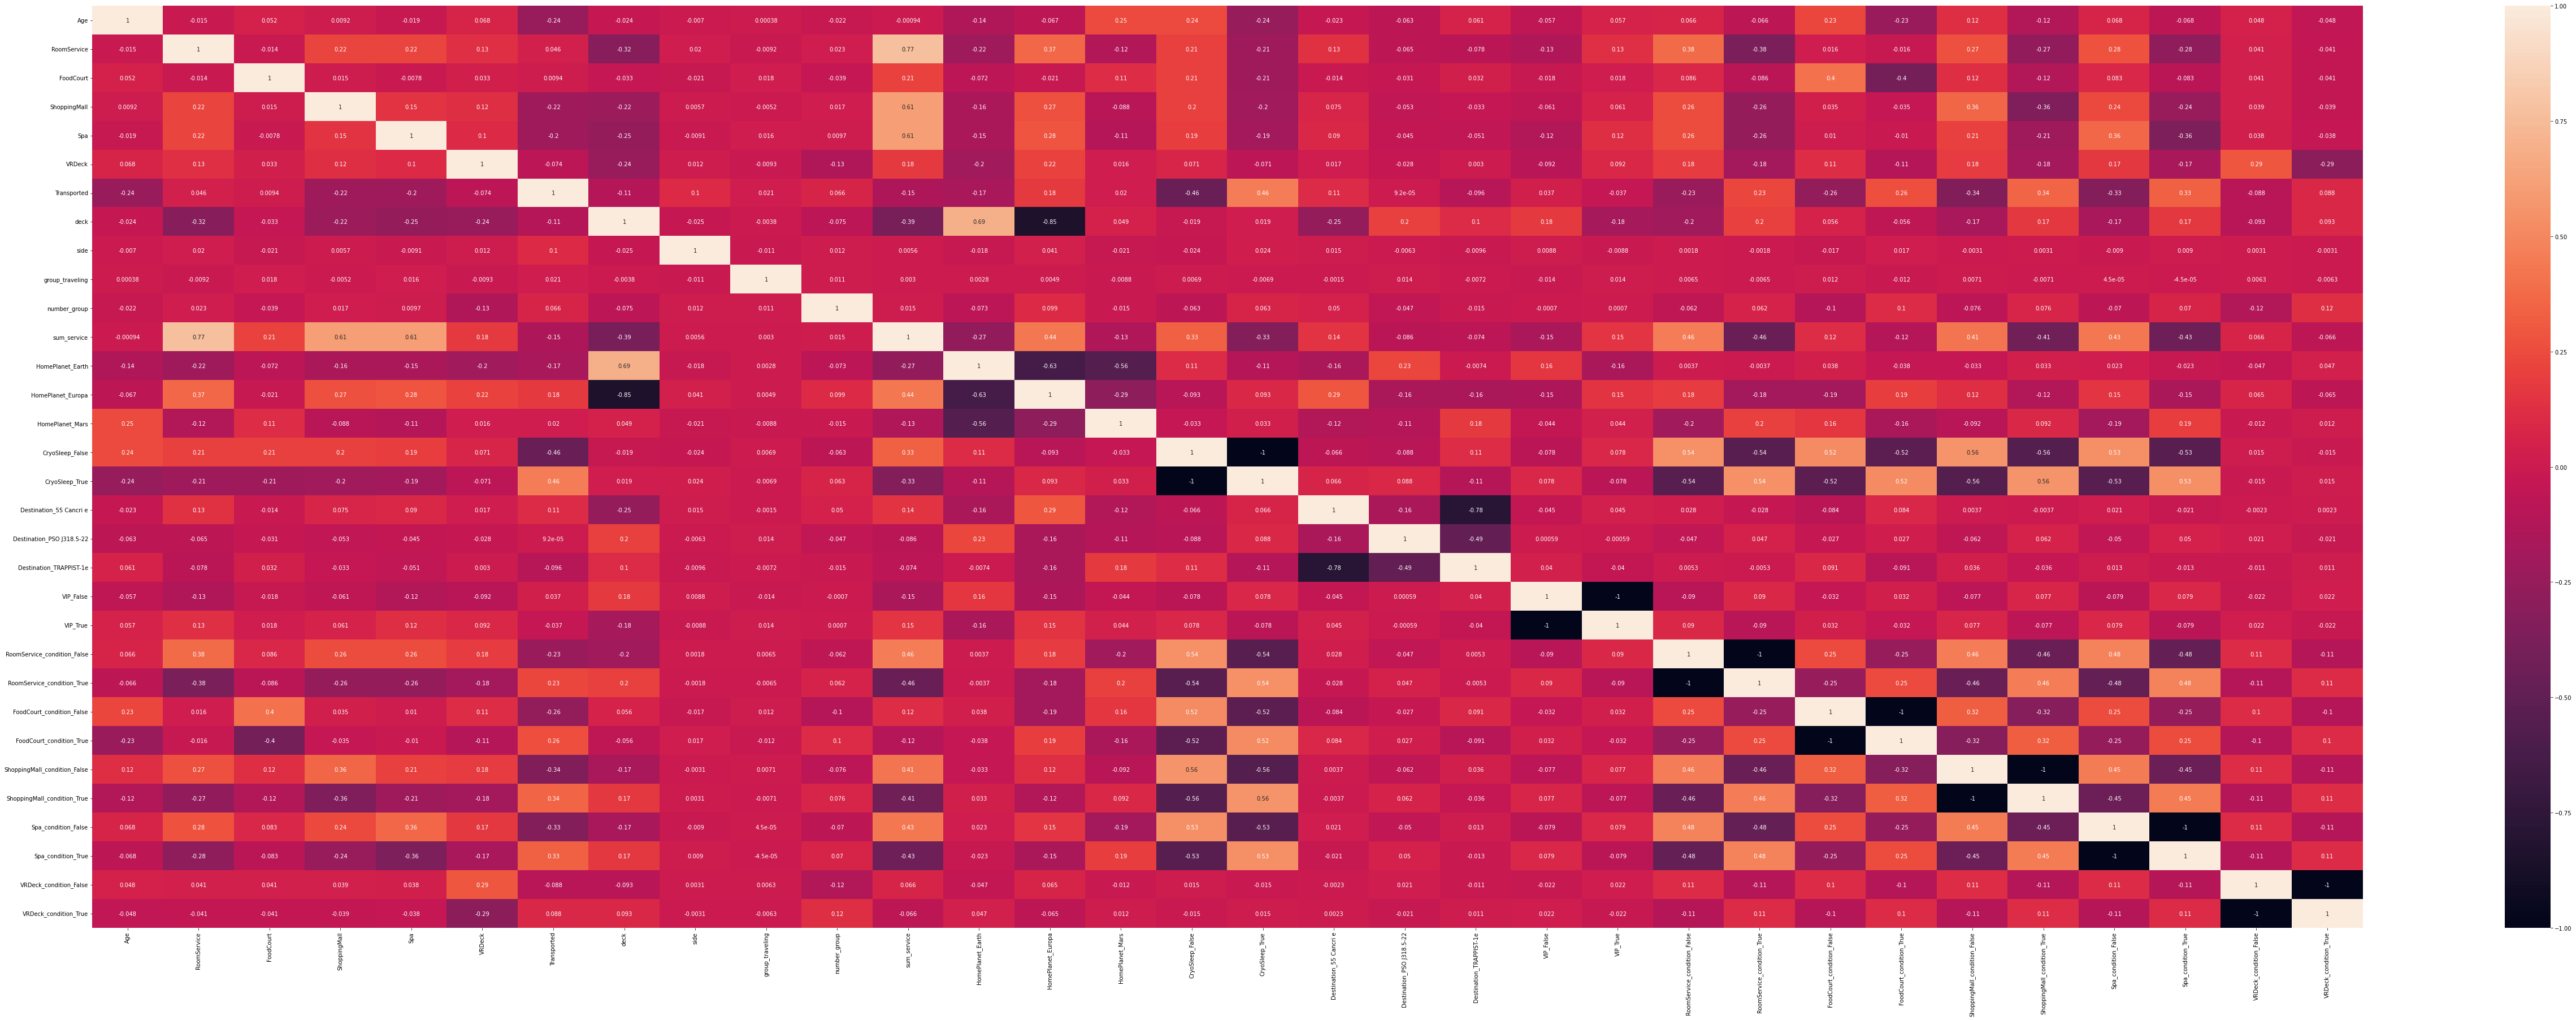

In [ ]:
plt.figure(figsize = (90,30))
df_corr = df_train.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,annot=True)


In [ ]:
df_columns = df_corr.columns.tolist()
for i in range(len(df_columns)):
  correlation_columns = df_corr[f'{df_corr.columns[i]}']

  for j in range(len(df_columns)):
    correleation_row = correlation_columns[j]
    # if df_columns[i] == 'Spending_Score' or df_columns[j] == 'Spending_Score':
    if (correleation_row < 1 and correleation_row > 0.8) or (correleation_row > -1 and correleation_row < -0.5):
    # if (correleation_row < 0.1 and correleation_row > -0.1):
      print(df_columns[i],df_columns[j],correleation_row)

deck HomePlanet_Europa -0.8462221986868519
HomePlanet_Earth HomePlanet_Europa -0.6332207014131644
HomePlanet_Earth HomePlanet_Mars -0.5596577133841268
HomePlanet_Europa deck -0.8462221986868519
HomePlanet_Europa HomePlanet_Earth -0.6332207014131644
HomePlanet_Mars HomePlanet_Earth -0.5596577133841268
CryoSleep_False CryoSleep_True -0.9999999999999997
CryoSleep_False RoomService_condition_True -0.5392636720121914
CryoSleep_False FoodCourt_condition_True -0.518191358124339
CryoSleep_False ShoppingMall_condition_True -0.5573564650104195
CryoSleep_False Spa_condition_True -0.5332883732978104
CryoSleep_True CryoSleep_False -0.9999999999999997
CryoSleep_True RoomService_condition_False -0.5392636720121913
CryoSleep_True FoodCourt_condition_False -0.5181913581243398
CryoSleep_True ShoppingMall_condition_False -0.55735646501042
CryoSleep_True Spa_condition_False -0.5332883732978102
Destination_55 Cancri e Destination_TRAPPIST-1e -0.7831372230109483
Destination_TRAPPIST-1e Destination_55 Cancri

In [ ]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side,group_traveling,number_group,...,RoomService_condition_False,RoomService_condition_True,FoodCourt_condition_False,FoodCourt_condition_True,ShoppingMall_condition_False,ShoppingMall_condition_True,Spa_condition_False,Spa_condition_True,VRDeck_condition_False,VRDeck_condition_True
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,...,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,220.009318,448.434027,169.572300,304.588865,298.261820,28.827930,4.321293,0.516162,4633.389624,1.517773,...,0.351317,0.648683,0.333372,0.666628,0.366502,0.633498,0.346256,0.653744,0.979524,0.020476
std,660.519050,1595.790627,598.007164,1125.562559,1134.126417,14.339054,1.760826,0.499767,2671.028856,1.054241,...,0.477409,0.477409,0.471445,0.471445,0.481876,0.481876,0.475803,0.475803,0.141631,0.141631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.000000,0.000000,2319.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,1.000000,4630.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,41.000000,61.000000,22.000000,53.000000,40.000000,37.000000,6.000000,1.000000,6883.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,79.000000,7.000000,1.000000,9280.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


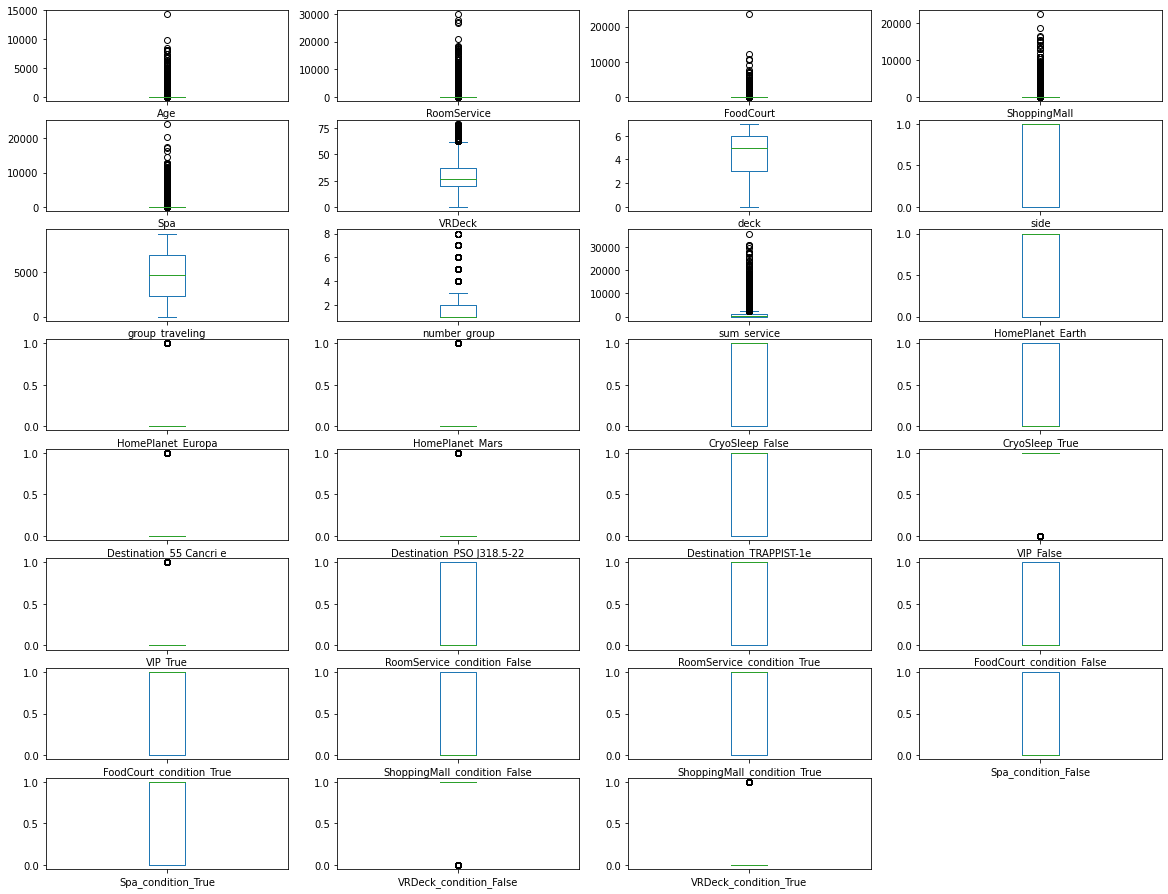

In [ ]:
df_train.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

# Feature Engineering

In [ ]:
OutlierFactor = LocalOutlierFactor()
predict_outlier = OutlierFactor.fit_predict(df_train)
print(predict_outlier)
df_train['check_outlier'] = predict_outlier.tolist()
df_train = df_train[df_train['check_outlier'] == 1].reset_index(drop=True).drop(['check_outlier'], axis=1)
df_train


[1 1 1 ... 1 1 1]


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side,group_traveling,...,RoomService_condition_False,RoomService_condition_True,FoodCourt_condition_False,FoodCourt_condition_True,ShoppingMall_condition_False,ShoppingMall_condition_True,Spa_condition_False,Spa_condition_True,VRDeck_condition_False,VRDeck_condition_True
0,0.0,0.0,0.0,0.0,0.0,39.0,False,1,0,1,...,0,1,0,1,0,1,0,1,1,0
1,109.0,9.0,25.0,549.0,44.0,24.0,True,5,1,2,...,1,0,1,0,1,0,1,0,1,0
2,43.0,3576.0,0.0,6715.0,49.0,58.0,False,0,1,3,...,1,0,0,1,1,0,1,0,1,0
3,0.0,1283.0,371.0,3329.0,193.0,33.0,False,0,1,3,...,1,0,1,0,1,0,1,0,1,0
4,303.0,70.0,151.0,565.0,2.0,16.0,True,5,1,4,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392,0.0,6819.0,0.0,1643.0,74.0,41.0,False,0,0,9276,...,1,0,0,1,1,0,1,0,1,0
8393,0.0,0.0,0.0,0.0,0.0,18.0,False,6,1,9278,...,0,1,0,1,0,1,0,1,1,0
8394,0.0,0.0,1872.0,1.0,0.0,26.0,True,6,1,9279,...,0,1,1,0,1,0,0,1,1,0
8395,0.0,1049.0,0.0,353.0,3235.0,32.0,False,4,1,9280,...,1,0,0,1,1,0,1,0,1,0


In [ ]:
df_train.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'deck', 'side', 'group_traveling', 'number_group',
       'sum_service', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True',
       'RoomService_condition_False', 'RoomService_condition_True',
       'FoodCourt_condition_False', 'FoodCourt_condition_True',
       'ShoppingMall_condition_False', 'ShoppingMall_condition_True',
       'Spa_condition_False', 'Spa_condition_True', 'VRDeck_condition_False',
       'VRDeck_condition_True'],
      dtype='object')

# train test split

In [ ]:
# train test split to protect data overfitting
features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'deck', 'side', 'group_traveling', 'number_group',
       'sum_service', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True',
       'RoomService_condition_False', 'RoomService_condition_True',
       'FoodCourt_condition_False', 'FoodCourt_condition_True',
       'ShoppingMall_condition_False', 'ShoppingMall_condition_True',
       'Spa_condition_False', 'Spa_condition_True', 'VRDeck_condition_False',
       'VRDeck_condition_True']
X = df_train.loc[:, features].to_numpy()
y = df_train.loc[:, 'Transported'].to_numpy()
print(X.shape, y.shape)

(8397, 31) (8397,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6717, 31), (1680, 31), (6717,), (1680,))

# Train multiple model with default parameter

In [ ]:
# Min max is used when we want to scale all the columns between same value like -1,1
# Standard scaler takes mean as 0 and then scale all the data according to  the unit variance.
# Robust will first remove outliers

from sklearn.pipeline import Pipeline

# In training a machine learning model, the problem that we often face is the distribution of data.
# we can use standard_scaler,robust_scaler,min_max_scaler to fix this problem
list_scalar = []
list_scalar.append(StandardScaler())
list_scalar.append(RobustScaler())
list_scalar.append(MinMaxScaler())

# we use machine learning 9 models to predict data
models = []
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('GaussianNB', GaussianNB()))
models.append(('XGBClassifier', XGBClassifier()))
models.append(('SGDClassifier', SGDClassifier()))
models.append(('MLPClassifier', MLPClassifier()))

all_name_model = []
all_mean_score = []
all_std_score = []
# evaluate each model in turn
results = []
names = []
name_scalar = []
name_plot = []
list_temp_accuracy_score = []
for i in range(len(list_scalar)):
  for name, model in models:
    print('scalar = ',list_scalar[i] ,'name =',name, 'model =', model)
    # we use pipeline to combine scalar and model
    pipe = Pipeline([('scaler', list_scalar[i]), ('clf', model)])
    name_scalar.append(list_scalar[i])
    name_plot.append(f"{name}_{list_scalar[i]}")

    kfold = model_selection.KFold(n_splits=10)

    cv_results = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold, scoring = "accuracy")
    pipe.fit(X_train, y_train)
    # predict y value
    y_pred_model =pipe.predict(X_test)
    results.append(cv_results)
    names.append(name)
    all_name_model.append(name)
    # cross validation mean score
    all_mean_score.append(cv_results.mean())
    # cross validation std score
    all_std_score.append(cv_results.std())
    print(name)
    # classification_report
    print(classification_report(y_test, y_pred_model))
    # accuracy score
    print(f'accuracy_score_{name}:',accuracy_score(y_test, y_pred_model))
    list_temp_accuracy_score.append(accuracy_score(y_test, y_pred_model))
    # confusion_matrix
    plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")
    plt.show()
# boxplot algorithm comparison
fig = plt.figure(figsize = (20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(name_plot, rotation=90)
# plt.figure(figsize = (90,30))
plt.show()
# data frame comparison
df_origin_predict = pd.DataFrame({
    'name_model' : all_name_model,
    'name_scalar': name_scalar,
    'mean_score_model' : all_mean_score,
    'std_score_model' : all_std_score,
    'accuracy_score':list_temp_accuracy_score
})
# sort average score model column to easy to see. which model is the best.
df_sort = df_origin_predict.sort_values(by=['mean_score_model'],ascending=False)
display(df_sort)


# Best model classification

scores: .0.806753 +/- .0.018025
test_scores: 0.8247781408112274
              precision    recall  f1-score   support

       False       0.77      0.76      0.77       817
        True       0.78      0.78      0.78       863

    accuracy                           0.77      1680
   macro avg       0.77      0.77      0.77      1680
weighted avg       0.77      0.77      0.77      1680



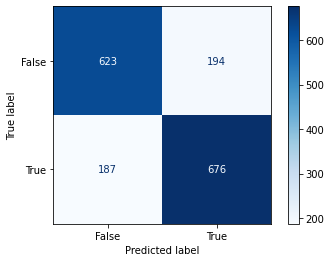

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# use best scalar and best parameter
type_scalar = RobustScaler()
the_best_model_classification = RandomForestClassifier(random_state=13)
# we use pipeline to combine scalar and model
pipe = Pipeline([('scaler', type_scalar), ('clf', the_best_model_classification)])
pipe.fit(X_train, y_train)
kfold = model_selection.KFold(n_splits=10)
# predict data and metric with f1-score
scores = model_selection.cross_val_score(pipe, X_train, y_train, cv=kfold)
print("========================================================")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print("test_scores:",scores.mean() + scores.std())
print("========================================================")

# visualization precision,recall,score
print(classification_report(y_test, pipe.predict(X_test)))
# visualization confusion matrix
plot_confusion_matrix(pipe, X_test, y_test,cmap="Blues")

# Feature Important

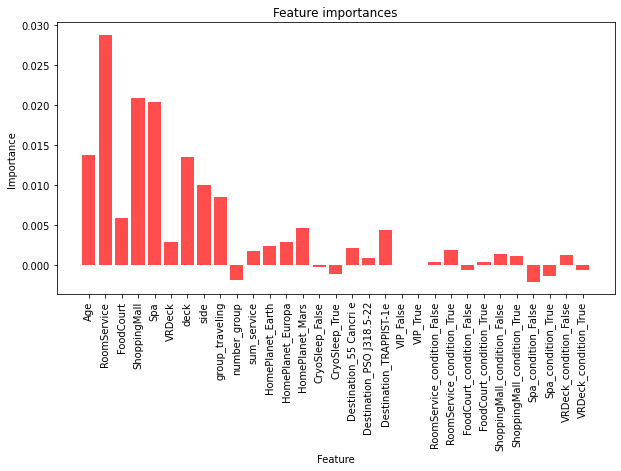

In [ ]:
# virtualization feature importances
def get_feature_importance(j, n):
  y_pred = pipe.predict(X_test)
  s = accuracy_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = pipe.predict(X_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    # score importance
    total += s_ij
  return s - total / n

# Feature importances
f = []
for j in range(X_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)
# Plot
plt.figure(figsize=(10, 5))
plt.bar(features, f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]), rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances")
plt.show()

# Predict Data

In [ ]:
df_csv = pd.read_csv("/content/gdrive/MyDrive/kaggle/spaceship_titanic/dataset/test.csv")
df_csv = df_csv[['PassengerId']]
df_csv.info()
df_csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
dtypes: object(1)
memory usage: 33.5+ KB


,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [ ]:
df_csv['Transported'] = pipe.predict(df_test)
df_csv

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
df_csv.to_csv("/content/gdrive/MyDrive/kaggle/spaceship_titanic/submission.csv")

